In [3]:
#Importing the important libraries needed for the project

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist

In [4]:
#Importing the libraries needed for model building

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D,Flatten

In [5]:
#Loading the dataset

(X_train, y_train) , (X_test, y_test) =mnist.load_data()
X_train=X_train/255
X_test=X_test/255

print('X_train shape=',X_train.shape)
print('X_test shape=',X_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
X_train shape= (60000, 28, 28)
X_test shape= (10000, 28, 28)


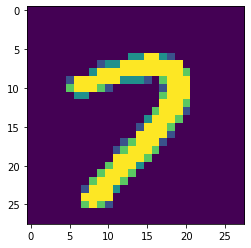

In [6]:
#View random images from the training set

idx=random.randint(0,len(X_train))
plt.imshow(np.array(X_train[idx,:]).reshape(28,28))
plt.show()

In [7]:
#Reshape the Dataset
X_train = X_train.reshape(-1,28,28,1)    
X_test = X_test.reshape(-1,28,28,1) 

In [8]:
#Model Building
model=Sequential([
    Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax'),
])

In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

Minimum Validation Loss: 0.0431


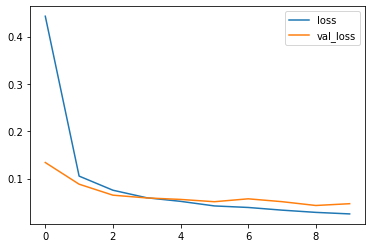

In [10]:
history=model.fit(X_train,y_train,epochs=10,batch_size=256,validation_split=0.2,verbose=0)
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

# Start the plot at epoch 10
#history_df.loc[10:, ['loss', 'val_loss']].plot()
#print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

In [11]:
model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0346 - accuracy: 0.9891


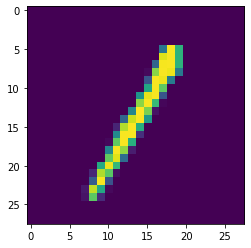


Our model says this figure represent the number:  1


In [12]:
idx2=random.randint(0,len(X_test))
plt.imshow(np.array(X_test[idx2,:]).reshape(28,28))
plt.show()
print('\nOur model says this figure represent the number: ',np.argmax(y_pred[idx2,:]))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
def predict_image(image):
  img_3d=image.reshape(-1,28,28)
  im_resize=img_3d/255.0
  prediction=model.predict(im_resize)
  pred=np.argmax(prediction)
  return pred

In [17]:
import gradio as gr
iface = gr.Interface(predict_image, inputs="sketchpad", outputs="label")

In [16]:
iface.launch(debug='True')

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://20497.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x7fc6b9c45e10>,
 'http://127.0.0.1:7860/',
 'https://20497.gradio.app')

In [18]:
#Saving the model using pickle
import pickle
file=open('model_dp.pkl','wb')
pickle.dump(model,file)
file.close()